# Data Visualization with Haberman Dataset 

## 1. Importing libraries

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
#using below code to ignore all warnings

import warnings
warnings.filterwarnings("ignore")

## 2. Importing Haberman dataset

In [2]:
#importing dataset
data= pd.read_csv(r'C:\Users\sunneysood\Documents\Python Scripts\AI\haberman.csv')

#Print first 5 rows of the dataset.
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 3. Identify columns and their data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


## Observation: 
 - There are four columns i.e. age, year, nodes and status.
 - All columns are of integer type and no column has any null values. 

# 4. Basic statistics for dataset

In [4]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Observation:
 - all 4 columns namely age, year, nodes and status has 306 rows with no NAN values present.
 - nodes columns has outlier with a max value of 52 and 75% at 4.0
 - an interesting observation from the above stats is about the nodes being 0.

Attributes information is given below(source: https://www.kaggle.com/gilsousa/haberman-s-survival/notebook):
 - Age of patient at time of operation (numerical)
 - Patient's year of operation (year - 1900, numerical)
 - Number of positive axillary nodes detected (numerical)
 - Survival status (class attribute)

  -  1 = the patient survived 5 years or longer

  - 2 = the patient died within 5 year
 

In [5]:
# display the 4 columns in the dataset
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# 5. Check for balanced vs unbalanced dataset

In [6]:
#
data['status'].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: status, dtype: float64

## Observations
 - out of 306 rows, 225 patients survived for 5 years or longer while 81 died within 5 years. 
 - around 74% cases survived while 26% cases didnot. this represents an unbalanced dataset and results are screwed towards patients who survived for more than 5 years 

# 6. Plots to understand features

## 6.1 Scatter Plots

### 6.1.1 Scatter Plot between age and Nodes feature

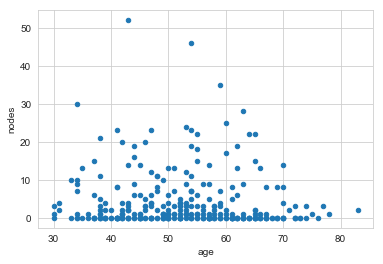

In [25]:
#2d scatter plot between age and nodes
data.plot(kind='scatter',x='age',y='nodes')
plt.show()

## Observation
 - a lot of patients have zero nodes.
 - Nodes start appearing at an early age of 30 and go all the way to 85. 
 - Also nodes above 25 are less frequent.

### 6.1.2 Scatter Plot between age and status feature

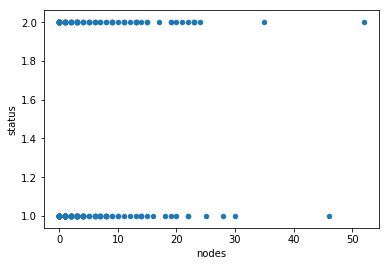

In [8]:
data.plot(kind='scatter',x='nodes',y='status')
plt.show()


## Observation
 - It is difficult to infer anything from this plot. let us try pair plot to identify any feature relationship pair wise.The above graph does not allow us to understand if a patient has high number of nodes, it decreases their survival rate.

## 6.2 Pair Plots

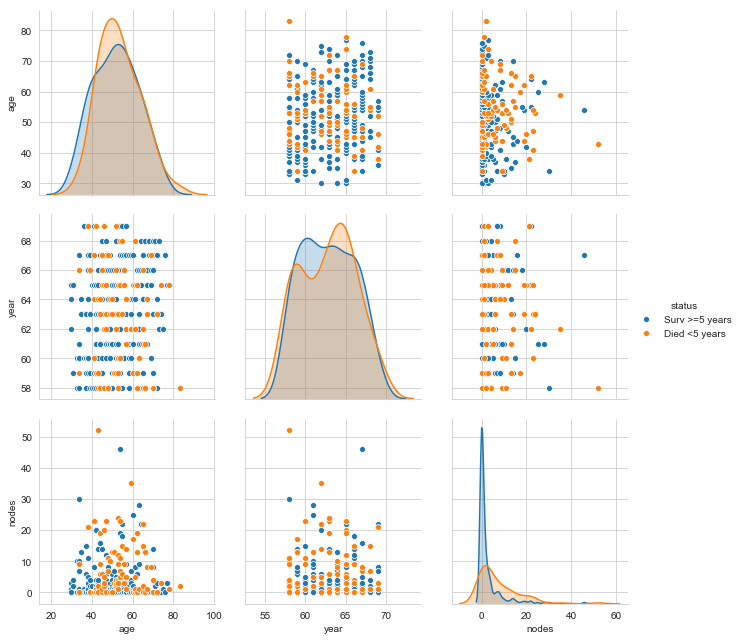

In [27]:
#pair plot
plt.close()
sea.set_style("whitegrid")
sea.pairplot(data,hue='status',size=3)
plt.show()


## Observation
 - The diagnol elements are PDFs for each feature. 
 - On looking at nodes vs nodes histogram, we can see that a lot of cases have zero nodes and higher frequency nodes are rare. 

## 6.3 Histograms

### 6.3.1 Changing Status column to categorial values 

Renaming status column values for better understanding of following analysis

In [10]:
#data['status']=data['status'].map(1:"Surv >=5 years",2:'Died <5 years')

data.loc[data['status']==1,'status']="Surv >=5 years"
data.loc[data['status']==2,'status']="Died <5 years"
data.head()

,age,year,nodes,status
0,30,64,1,Surv >=5 years
1,30,62,3,Surv >=5 years
2,30,65,0,Surv >=5 years
3,31,59,2,Surv >=5 years
4,31,65,4,Surv >=5 years


As seen from status column, transformation the status column from int to string based to easly identify status values 

### 6.3.2 Histogram between Nodes and Status

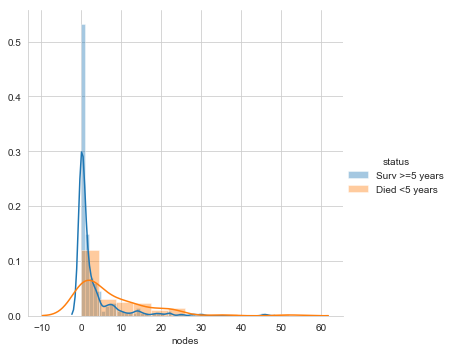

In [11]:
#drawing histograms to identify any relationship in data
sea.FacetGrid(data, hue="status", size=5) \
   .map(sea.distplot, "nodes") \
   .add_legend();
plt.show();

### Observation
 - this chart doesnot allow any inference from the data apart from seeing that both the values are right skewed. 

### 6.3.3 Histogram between Year and Status

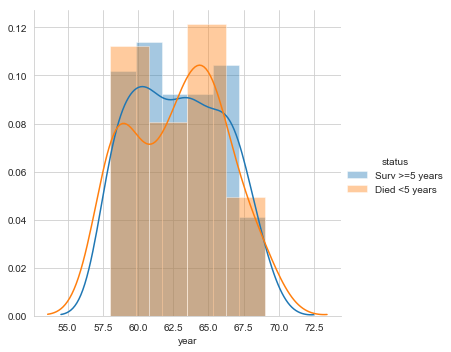

In [12]:
sea.FacetGrid(data, hue="status", size=5) \
   .map(sea.distplot, "year") \
   .add_legend();
plt.show();

### Observation
 - we can't infer anything from the above chart.

### 6.3.4 Histogram between age and Status

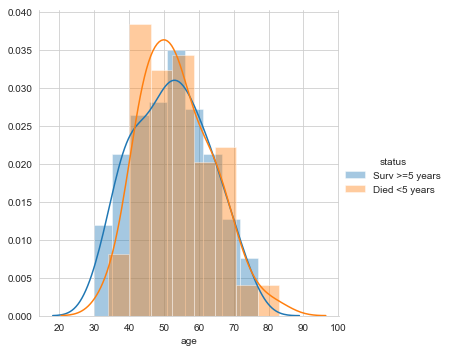

In [13]:
sea.FacetGrid(data, hue="status", size=5) \
   .map(sea.distplot, "age") \
   .add_legend();
plt.show();

### Observation

 -  survival probability is higher when at the time of surgery is less than 40. 
 -  in between 40-75 age group, we can't say clearly about the survival chances. 
 - beyond 75, survival chances decreases sharply.

## 6.4 Box Plots

### 6.4.1 Box plot for Nodes

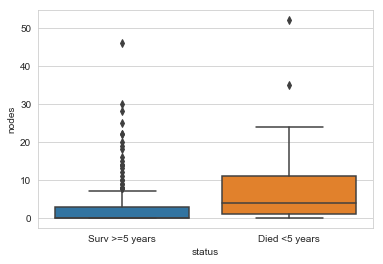

In [14]:
#using box plots for nodes

sea.boxplot(x='status',y='nodes',data=data)
plt.show()

### Observation
 -  patients survive for longer years i.e. greater than 5 years if number of nodes is less than 2 as maximum 25 to 75 quantile values lie in this space.
 - patients with nodes in range of 1 to 11 have less chances of survival beyond 5 years.

### 6.4.2 Box plot for Age

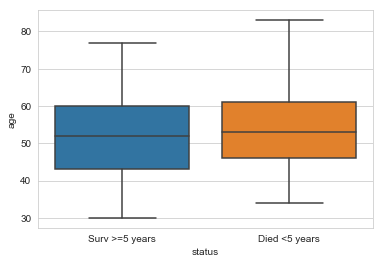

In [15]:
#using box plots for age

sea.boxplot(x='status',y='age',data=data)
plt.show()

### Observation
 - In the age group of 43-45(while looking at data for survivers surviving for 5 years and longer), patients have a higher survival chance.

### 6.4.3 Box plot for Year 

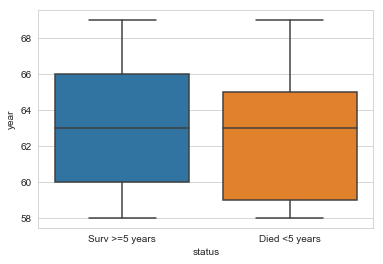

In [16]:
#using box plots for year

sea.boxplot(x='status',y='year',data=data)
plt.show()

### Observation
 - Survival rate improved after 1965. We can assume that the gain in survival rate might be through advancement in medical sciences. 

## 6.5 Violin Plots

### 6.5.1 Violin Plot between node and status

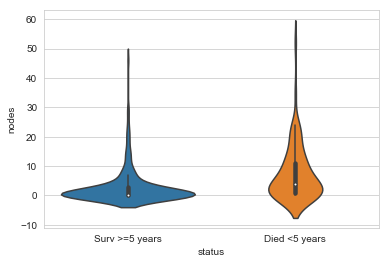

In [17]:
#violin plots

sea.violinplot(x='status',y='nodes',data=data)
plt.show()

### Observation
 - We can infer that survival chances are higher for patients with very few nodes i.e. around zero.

### 6.5.2 Violin Plot between age and status

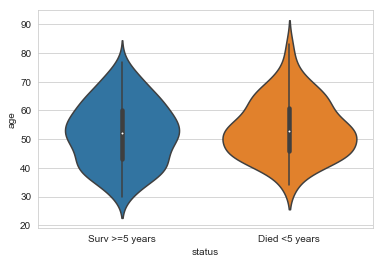

In [18]:
sea.violinplot(x='status',y='age',data=data)
plt.show()

### Observation
 - we can't infer much from the above voilin chart

### 6.5.3 Violin Plot between year and status

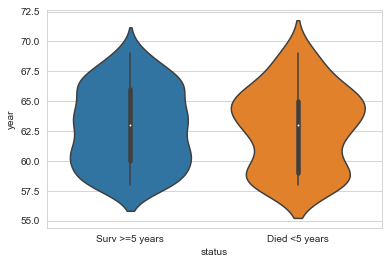

In [19]:
sea.violinplot(x='status',y='year',data=data)
plt.show()

### Observation
- we can't infer much from the above plot.

# 7. CDF for Nodes column

## 7.1 PDF and CDF of nodes for survivers who survived 5 years or longer

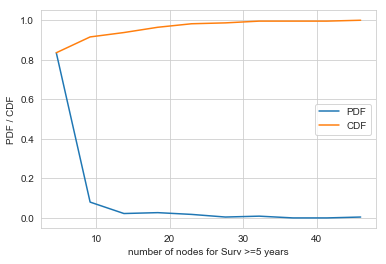

In [33]:
#cdf of nodes column for survivers who survived for 5 years or longer
surv_more_than_5_year= data.loc[data['status']=='Surv >=5 years']
counts, bin_edges = np.histogram(surv_more_than_5_year['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

plt.plot(bin_edges[1:],pdf,label='PDF')
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('PDF / CDF')
plt.legend()
plt.xlabel('number of nodes for Surv >=5 years')

plt.show();

### Observation
 - we can't conclude much from the above cdf distribution

## 7.2 PDF and CDF of nodes for survivers who survived less than 5 years

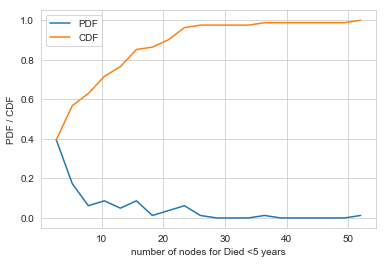

In [36]:
#cdf of nodes column for those who survived for less than a year
surv_less_than_1_year= data.loc[data['status']=='Died <5 years']
counts, bin_edges = np.histogram(surv_less_than_1_year['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label='PDF');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.legend()
plt.ylabel('PDF / CDF')
plt.xlabel('number of nodes for Died <5 years')
plt.show();

### Observation
 - For number of nodes above 5, survival rates reduces sharply.

## 7.3 PDF and CDF of age for survivers who survived 5 years or longer

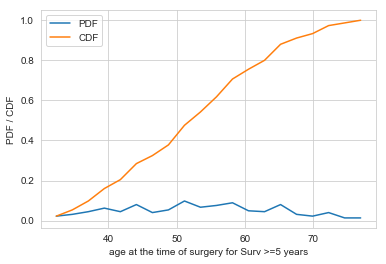

In [37]:
#cdf of age column
surv_more_than_5_year= data.loc[data['status']=='Surv >=5 years']
counts, bin_edges = np.histogram(surv_more_than_5_year['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label='PDF');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.legend()
plt.ylabel('PDF / CDF')
plt.xlabel('age at the time of surgery for Surv >=5 years')
plt.show();

### Observation:
- we can't conclude much from the above chart.

## 7.4 PDF and CDF of age for survivers who survived less than 5 years

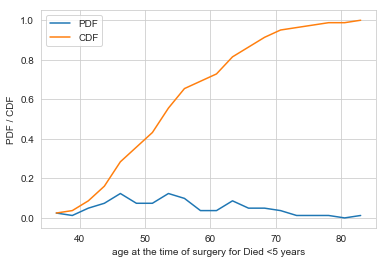

In [38]:
#cdf of age column
surv_less_than_1_year= data.loc[data['status']=='Died <5 years']
counts, bin_edges = np.histogram(surv_less_than_1_year['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label='PDF');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf, label='CDF')
plt.legend()
plt.ylabel('PDF / CDF')
plt.xlabel('age at the time of surgery for Died <5 years')
plt.show();

### Observation
 - we can't conclude much from the above chart.